# **Load the Dataset**

In [1]:
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# **Data Preprocessing**

In [3]:
# Normalising pixel vlues to [0,1] and flattening
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255

In [4]:
# Converting labels to numerical using one-hot encoding
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# **Build the Model**

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, kernel_size = (3, 3), activation = "relu", input_shape = (28, 28, 1)),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(32, kernel_size = (3, 3), activation = "relu"),
    MaxPooling2D(pool_size = (2,2)),
    Flatten(),
    Dense(128, activation = "relu"),
    Dropout(0.5),   # Reduces overfitting
    Dense(10, activation = "softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Compilation**

In [6]:
model.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

# **Model Training**

In [7]:
model.fit(
    x_train, y_train,
    validation_split = 0.2,     # 20% of data will be use for validation
    epochs = 20,
    batch_size = 64,            # Number of sample per epoch
    verbose = 1                 # Show progress bar
)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7935 - loss: 0.6539 - val_accuracy: 0.9774 - val_loss: 0.0783
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9653 - loss: 0.1180 - val_accuracy: 0.9834 - val_loss: 0.0590
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9741 - loss: 0.0848 - val_accuracy: 0.9874 - val_loss: 0.0472
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9793 - loss: 0.0702 - val_accuracy: 0.9887 - val_loss: 0.0430
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9840 - loss: 0.0534 - val_accuracy: 0.9877 - val_loss: 0.0440
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9847 - loss: 0.0505 - val_accuracy: 0.9895 - val_loss: 0.0394
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9867 - loss: 0.0435 - val_accuracy: 0.9893 - val_loss: 0.0405
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9883 - loss: 0.0364 - val_accuracy: 0.

# **Model Evaluation**

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy :", test_acc)
print("Test loss :", test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9910 - loss: 0.0309
Test accuracy : 0.9926000237464905
Test loss : 0.026482699438929558


# **Visualize predictions**

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


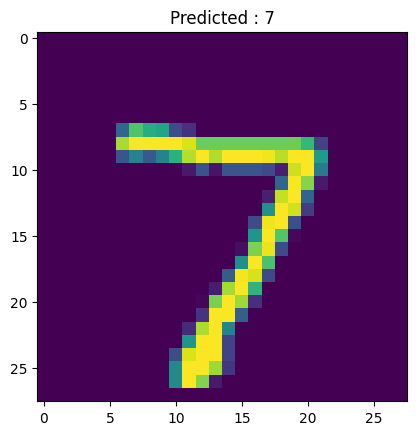

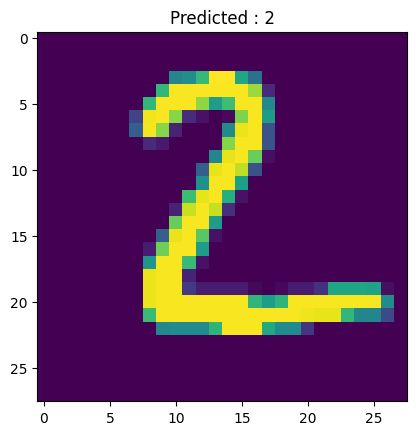

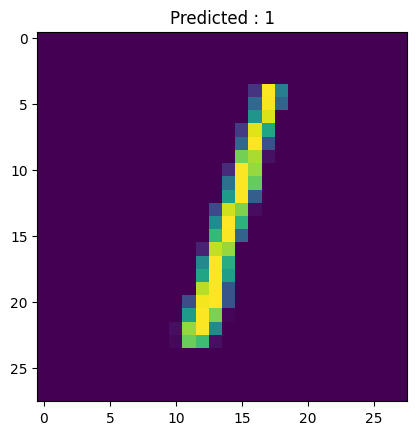

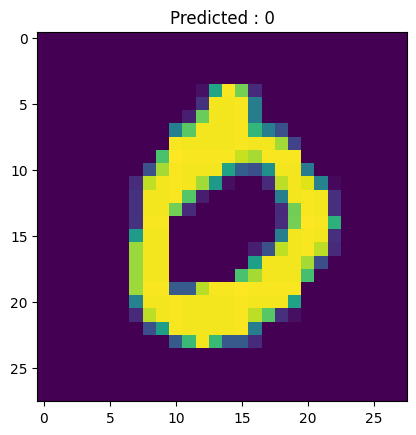

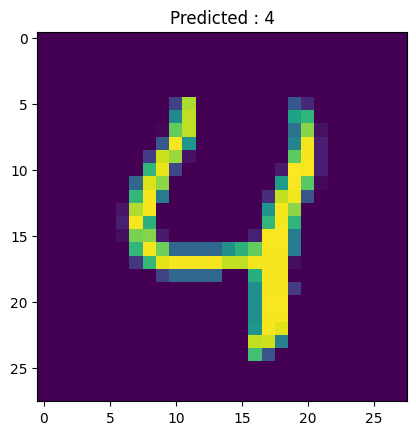

In [11]:
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28))
    plt.title(f"Predicted : {np.argmax(pred[i])}")
    plt.show()

# **More Predictions**

In [12]:
import os
import cv2
from keras.models import load_model

In [13]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/Deep Learning/CNN/samples of handwritten digits"
images = os.listdir("/content/drive/MyDrive/Colab Notebooks/Deep Learning/CNN/samples of handwritten digits")

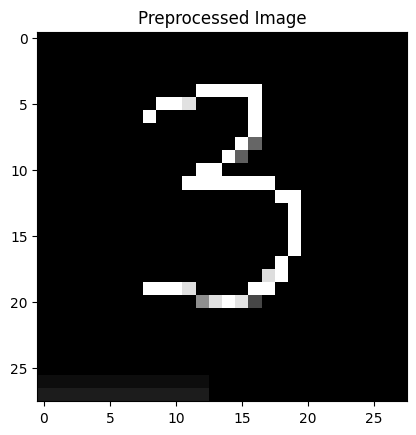

The model predicts the digit as : 3








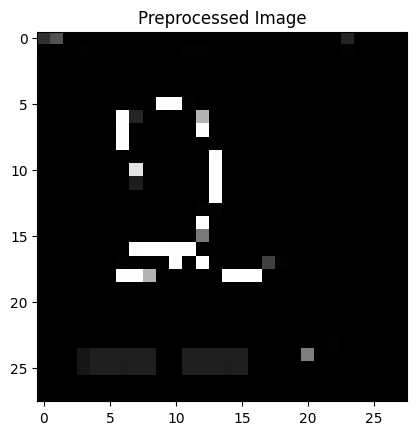

The model predicts the digit as : 2








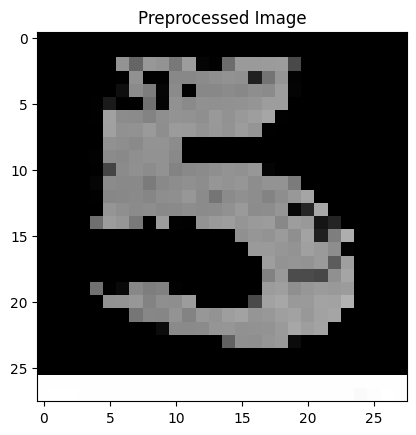

The model predicts the digit as : 5








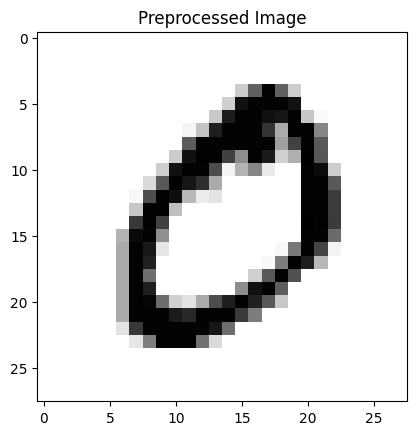

The model predicts the digit as : 0








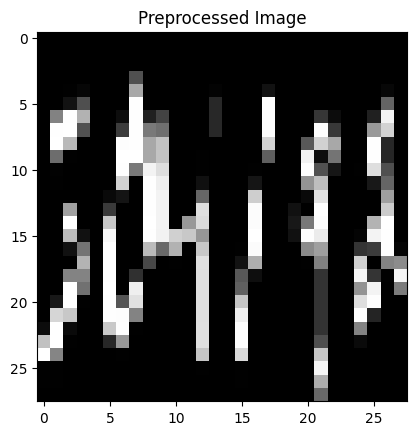

The model predicts the digit as : 4








In [18]:
for pic in images:
    image_path = os.path.join(folder_path, pic)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # read as grayscale
    img_resize = cv2.resize(img, (28,28))
    img_resize = 255 - img_resize   # invert colors (if background is white and digit is black)
    img_normal = img_resize / 255.0 # normalize the pixel values
    img_reshape = img_normal.reshape(1, 28, 28, 1).astype("float32")

    plt.imshow(img_normal, cmap = "gray")
    plt.title("Preprocessed Image")
    plt.show()

    pred = model.predict(img_reshape, verbose = 0)
    digit = np.argmax(pred)

    print(f"The model predicts the digit as : {digit}")
    print("\n" * 5)

# **Real time predictions**

In [15]:
import cv2
from keras.models import load_model

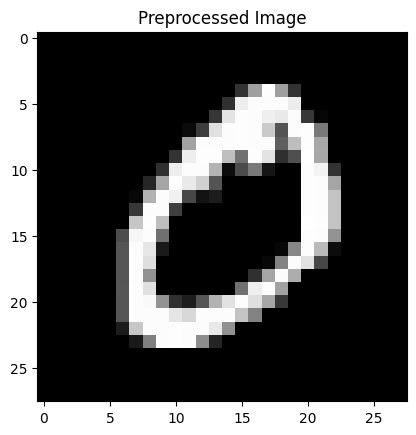

In [16]:
image_path = "/content/drive/MyDrive/Colab Notebooks/Deep Learning/CNN/samples of handwritten digits/sifr.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # read as grayscale
img_resize = cv2.resize(img, (28,28))
# img_resize = 255 - img_resize   # invert colors (if background is white and digit is black)
img_normal = img_resize / 255.0 # normalize the pixel values
img_reshape = img_normal.reshape(1, 28, 28, 1).astype("float32")

plt.imshow(img_normal, cmap = "gray")
plt.title("Preprocessed Image")
plt.show()

In [17]:
pred = model.predict(img_reshape, verbose = 0)
digit = np.argmax(pred)

print(f"The model predicts the digit as : {digit}")

The model predicts the digit as : 0
